### Define the situation

##### Predict hireability of students in a training program. If predicted that they will be hired, also ascertain when they will be hired.

The data is given in excel format. Based on the features given, hireability of a training student must be predicted, along with the date of hire. Since this is a yes or no question, the first part of the problem will be a classification problem. Since there is previous information of hired/not hired, this is a supervised-classification problem. Logistic Regression can be used here.

### Exploratory Data Analysis

##### The task here is to discovery preliminary insights of data after loading into pandas dataframe.

In [15]:
#Import libraries


import pandas as pd
import numpy as np
from numpy import percentile
from numpy import random
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from scipy.stats import chi2_contingency
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from numpy import isnan
from sklearn.linear_model import LogisticRegression
from numpy import asarray
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [16]:
#Read excel data into dataframe


hireability_df = pd.read_excel('/Users/riyasebastian/Desktop/Data_training_program.xlsx')

In [17]:
#View first 10 rows of new dataframe


hireability_df.head(10)

,id,student_status,primary_track,batch,training_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,Biology,OCT19A,NaN,0,Unemployed,Bachelors Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,Chemistry,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Math,AUG19B,0.0,0,Employed Part-Time,Masters Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,Chemistry,AUG19B,0.0,0,Contractor,Bachelors Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,Biology,AUG19A,89.0,1,Unemployed,Bachelors Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
5,6,Closed Lost,Biology,AUG19A,0.0,0,Employed Full-Time,Masters Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American
6,7,Closed Lost,Biology,AUG19B,0.0,0,Employed Full-Time,Masters Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American"
7,8,Withdrawn (Failed),Biology,AUG19A,19.0,0,Employed Part-Time,Bachelors Degree,Less than one month,Getting past final round interviews,1-2 years,Citizen,4.0,15,Female,Latino or Hispanic American
8,9,Active,Biology,AUG19B,NaN,0,Student,Masters Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,Male,East Asian or Asian American
9,10,Withdrawn (Trial),Biology,SEP19A,13.0,0,Employed Full-Time,Masters Degree,Less than one month,Getting past final round interviews,3-4 years,Citizen,0.0,10,Male,"Black, Afro-Caribbean, or African American"


In [18]:
#Rows and columns of dataset


hireability_df.shape

(2544, 16)

In [19]:
#Set id as index


hireability_df.set_index('id')

,student_status,primary_track,batch,training_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
id,,,,,,,,,,,,,,,
1,Active,Biology,OCT19A,NaN,0,Unemployed,Bachelors Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
2,Active,Chemistry,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
3,Closed Lost,Math,AUG19B,0.0,0,Employed Part-Time,Masters Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
4,Closed Lost,Chemistry,AUG19B,0.0,0,Contractor,Bachelors Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
5,Placed,Biology,AUG19A,89.0,1,Unemployed,Bachelors Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,Withdrawn (Failed),Math,JUN18A,457.0,0,Contractor,Masters Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2541,Withdrawn (Failed),Physics,JAN19B,488.0,0,NaN,Masters Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2542,Active,Biology,SEP18C,NaN,0,Contractor,Bachelors Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American


##### ID column may not be useful for prediction. So its best to change it as index for the dataframe. Also some null values are observed.

In [20]:
#View all columns of dataframe


hireability_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   student_status               2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   batch                        2536 non-null   object 
 4   training_duration_days       1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

##### There are many null values. 'program_duration_days' and 'number_of_interviews' will need to be converted to 'int' after handling null values.

In [21]:
#Number of null values in each column


hireability_df.isnull().sum()

id                               0
student_status                   0
primary_track                    0
batch                            8
training_duration_days         616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

##### There are many null values, which must be imputed.

##### This gives an indiciation of which columns have most null values.

In [22]:
#Create a copy of dataframe


df = hireability_df.copy()

#### Explore features 

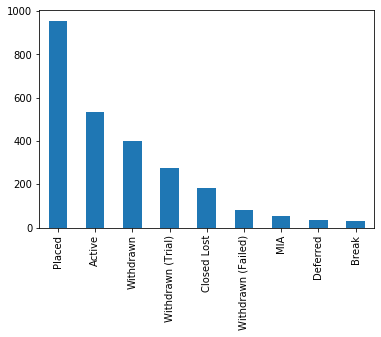

In [23]:
#student_status is a categorical nominal variable. Plot using bar plot.
df['student_status'].value_counts().plot.bar()

In [24]:
#create contingency matrix for student_status
student_status_placed_ct = pd.crosstab(index=df['student_status'],columns=df['placed'], margins=True)
student_status_placed_ct

placed,0,1,All
student_status,,,
Active,532,0,532
Break,32,0,32
Closed Lost,182,0,182
Deferred,34,0,34
MIA,52,0,52
Placed,0,956,956
Withdrawn,398,0,398
Withdrawn (Failed),82,0,82
Withdrawn (Trial),276,0,276


***Future investigation possibilities: Ideally I could have used a chi-square  test betweeen these variables, but since there are many 0s in the contingency table, I did cannot use this test. Maybe I can include 4-5 incidences where it is currently 0 and then use chi-square test. I can try this out in the future.***

The maximum categories are in 'placed'. Including this feature, may lead to over-fitting. All the rows in the 'placed' category in this column correspond to exactly 1 in the 'placed' target column.

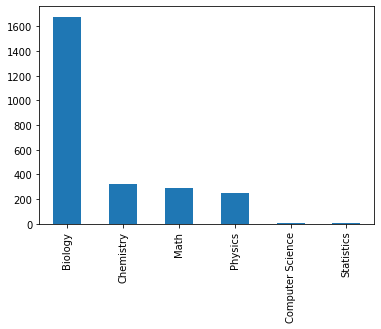

In [25]:
df['primary_track'].value_counts().plot.bar()

The maximum number of Pathrise fellow are SWE.

In [26]:
primary_track_placed_ct = pd.crosstab(index=df['primary_track'],columns=df['placed'], margins=True)
primary_track_placed_ct

placed,0,1,All
primary_track,,,
Biology,984,694,1678
Chemistry,242,80,322
Computer Science,5,1,6
Math,196,92,288
Physics,160,88,248
Statistics,1,1,2
All,1588,956,2544


Null Hypothesis: There is no relationship between primary_track and placed. 
Alternate Hypothesis: There is a relationship between primary_track and placed.

In [27]:
(chi2, p, dof, _) = chi2_contingency([primary_track_placed_ct.iloc[0].values, primary_track_placed_ct.iloc[1].values])
print("chi2    : " ,chi2 )
print("p_value : " , p)
print("dof     : " , dof)

chi2    :  31.056538881285675
p_value :  1.803674928061492e-07
dof     :  2


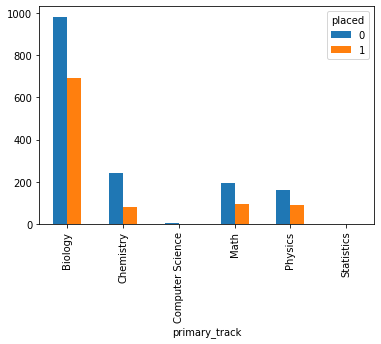

In [28]:
pd.crosstab(df.primary_track,df.placed).plot(kind='bar')

##### From the chi-square test, there is no relationship between these two categorical variables. Since p-value is > 0,05 we fail to reject the null hypothesis. From the bar plot, we can tell that Biology has a more placed percentage than the other fields. This is a critical field, so it must be included, even though chi-square test says otherwise. The correct relationship may not be getting displayed since this is a modified dataset.

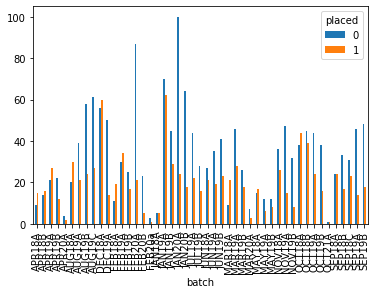

In [31]:
pd.crosstab(df.batch,hireability_df.placed).plot(kind='bar')

***It is difficult to ascertain the relationship between cohort_tag and placed. Also when we one-hot encode this, this will lead to too many columns. So this feature will be omitted from our analysis. 
In the future, I would like to include this feature and try out 'LeaveOneHotEncoder' module in pandas***

In [33]:
#Relationship between 'program duration days' and 'placed'
df['training_duration_days'].isnull().sum()/df.shape[0]

0.24213836477987422

Since there is 24% null values, we will check the distribution after imputing.

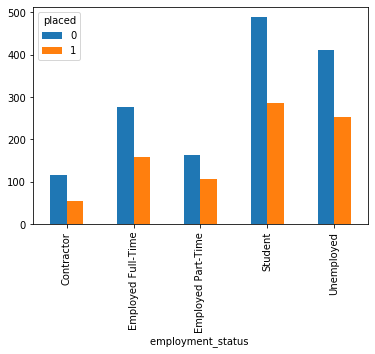

In [34]:
pd.crosstab(df['employment_status '],df.placed).plot(kind='bar')

In [35]:
employment_status_ct = pd.crosstab(index=df['employment_status '],columns=df['placed'], margins=True)
employment_status_ct

placed,0,1,All
employment_status,,,
Contractor,116,54,170
Employed Full-Time,277,158,435
Employed Part-Time,164,106,270
Student,489,286,775
Unemployed,412,253,665
All,1458,857,2315


Null Hypothesis: There is no relationship between employment_status and placed. 
Alternate Hypothesis: There is a relationship between employment_status and placed.

In [36]:
(chi2, p, dof, _) = chi2_contingency([employment_status_ct.iloc[0].values, employment_status_ct.iloc[1].values])
print("chi2    : " ,chi2 )
print("p_value : " , p)
print("dof     : " , dof)

chi2    :  1.115189281885845
p_value :  0.572584680506774
dof     :  2


##### From the chi-square test, there is no relationship between these two categorical variables. Since p-value is > 0,05 we fail to reject the null hypothesis. From the bar plot, we can tell that there could be an effect of employment_status on placed. This is a critical field, so it must be included, even though chi-square test says otherwise. The correct relationship may not be getting displayed since this is a modified dataset.

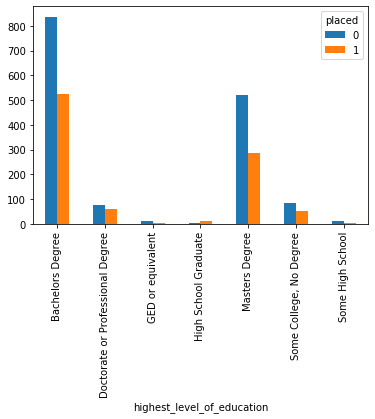

In [37]:
pd.crosstab(df.highest_level_of_education,df.placed).plot(kind='bar')

In [38]:
high_edu_ct = pd.crosstab(index=df['highest_level_of_education'],columns=df['placed'], margins=True)
high_edu_ct

placed,0,1,All
highest_level_of_education,,,
Bachelors Degree,837,524,1361
Doctorate or Professional Degree,76,59,135
GED or equivalent,10,5,15
High School Graduate,5,10,15
Masters Degree,522,288,810
"Some College, No Degree",85,50,135
Some High School,11,4,15
All,1546,940,2486


In [39]:
(chi2, p, dof, _) = chi2_contingency([high_edu_ct.iloc[0].values, high_edu_ct.iloc[1].values])
print("chi2    : " ,chi2 )
print("p_value : " , p)
print("dof     : " , dof)

chi2    :  1.3977364498606133
p_value :  0.4971476448199693
dof     :  2


##### From the chi-square test, there is no relationship between these two categorical variables. Since p-value is > 0,05 we fail to reject the null hypothesis. From the bar plot, we can tell that there could be an effect of highest_level_of_education on placed. This is a critical field, so it must be included, even though chi-square test says otherwise. The correct relationship may not be getting displayed since this is a modified dataset.

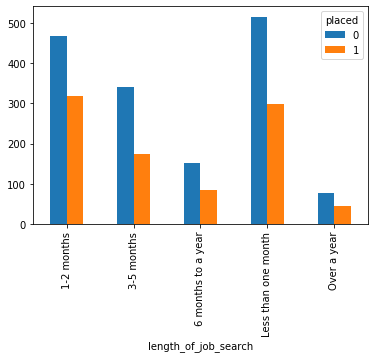

In [40]:
pd.crosstab(df.length_of_job_search,df.placed).plot(kind='bar')

In [41]:
len_job_search_ct = pd.crosstab(index=df['length_of_job_search'],columns=df['placed'], margins=True)
len_job_search_ct

placed,0,1,All
length_of_job_search,,,
1-2 months,467,318,785
3-5 months,341,174,515
6 months to a year,151,84,235
Less than one month,516,299,815
Over a year,76,44,120
All,1551,919,2470


In [42]:
(chi2, p, dof, _) = chi2_contingency([len_job_search_ct.iloc[0].values, len_job_search_ct.iloc[1].values])
print("chi2    : " ,chi2 )
print("p_value : " , p)
print("dof     : " , dof)

chi2    :  5.975701671004034
p_value :  0.05039562891705923
dof     :  2


##### We reject null hypothesis. This is a critical feature. The lengh of the job search is deterministic of 'placed'.

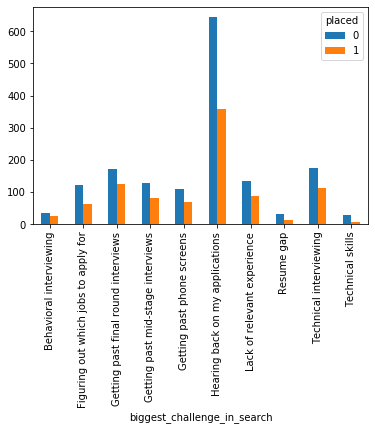

In [43]:
pd.crosstab(df.biggest_challenge_in_search,df.placed).plot(kind='bar')

***Those who had challenge hearing back had lower placed rates. Pathrise must give special focus to this set of fellows, where there is no feedback on job applications.***

In [44]:
big_chall_in_search_ct = pd.crosstab(index=df['biggest_challenge_in_search'],columns=df['placed'], margins=True)
big_chall_in_search_ct

placed,0,1,All
biggest_challenge_in_search,,,
Behavioral interviewing,36,24,60
Figuring out which jobs to apply for,123,63,186
Getting past final round interviews,170,124,294
Getting past mid-stage interviews,128,82,210
Getting past phone screens,110,70,180
Hearing back on my applications,644,358,1002
Lack of relevant experience,134,88,222
Resume gap,30,12,42
Technical interviewing,176,112,288


In [45]:
(chi2, p, dof, _) = chi2_contingency([big_chall_in_search_ct.iloc[0].values, big_chall_in_search_ct.iloc[1].values])
print("chi2    : " ,chi2 )
print("p_value : " , p)
print("dof     : " , dof)

chi2    :  0.7455327722626822
p_value :  0.6888261333867787
dof     :  2


null - cant reject

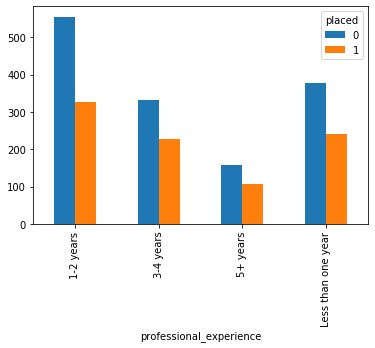

In [46]:
pd.crosstab(df.professional_experience,df.placed).plot(kind='bar')

***The trend shows that 1-2 years needs more focus than other categories. This is a feature we must consider in the model.***

In [47]:
prof_exp_ct = pd.crosstab(index=df['professional_experience'],columns=df['placed'], margins=True)
prof_exp_ct

placed,0,1,All
professional_experience,,,
1-2 years,555,327,882
3-4 years,331,227,558
5+ years,157,107,264
Less than one year,378,240,618
All,1421,901,2322


In [48]:
(chi2, p, dof, _) = chi2_contingency([prof_exp_ct.iloc[0].values, prof_exp_ct.iloc[1].values])
print("chi2    : " ,chi2 )
print("p_value : " , p)
print("dof     : " , dof)

chi2    :  1.8776518154762045
p_value :  0.39108673782149667
dof     :  2


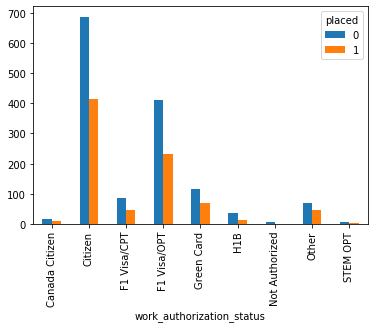

In [49]:
pd.crosstab(df.work_authorization_status,df.placed).plot(kind='bar')

In [50]:
work_auth_ct = pd.crosstab(index=df['work_authorization_status'],columns=df['placed'], margins=True)
work_auth_ct

placed,0,1,All
work_authorization_status,,,
Canada Citizen,15,9,24
Citizen,689,415,1104
F1 Visa/CPT,86,46,132
F1 Visa/OPT,412,232,644
Green Card,114,70,184
H1B,35,13,48
Not Authorized,4,0,4
Other,68,44,112
STEM OPT,6,2,8


***There is a steady trend across all visa status***

In [51]:
(chi2, p, dof, _) = chi2_contingency([work_auth_ct.iloc[0].values, prof_exp_ct.iloc[1].values])
print("chi2    : " ,chi2 )
print("p_value : " , p)
print("dof     : " , dof)

chi2    :  0.09658476788541688
p_value :  0.9528551467998669
dof     :  2


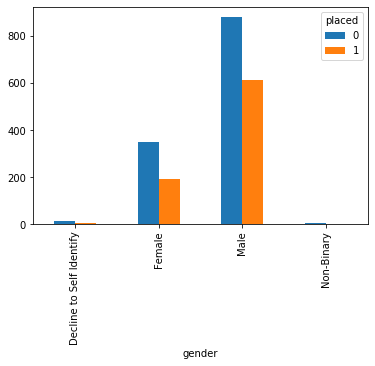

In [52]:
pd.crosstab(df.gender,df.placed).plot(kind='bar')

In [53]:
gender_ct = pd.crosstab(index=df['gender'],columns=df['placed'], margins=True)
gender_ct

placed,0,1,All
gender,,,
Decline to Self Identify,13,3,16
Female,348,190,538
Male,880,612,1492
Non-Binary,5,1,6
All,1246,806,2052


In [54]:
(chi2, p, dof, _) = chi2_contingency([gender_ct.iloc[0].values, gender_ct.iloc[1].values])
print("chi2    : " ,chi2 )
print("p_value : " , p)
print("dof     : " , dof)

chi2    :  1.8783739062088074
p_value :  0.3909455632537297
dof     :  2


***To a large extent, gender does not affect placement. But pathrise can focus on increasing number of female applications.***

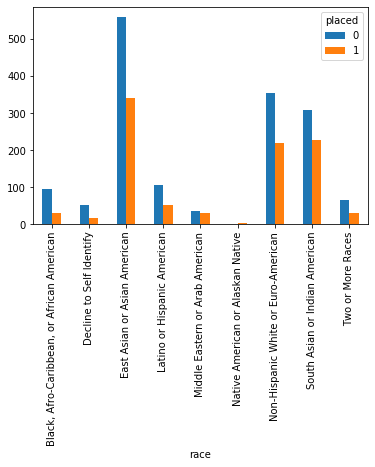

In [55]:
pd.crosstab(df.race,df.placed).plot(kind='bar')

In [56]:
race_ct = pd.crosstab(index=df['race'],columns=df['placed'], margins=True)
race_ct

placed,0,1,All
race,,,
"Black, Afro-Caribbean, or African American",95,31,126
Decline to Self Identify,53,16,69
East Asian or Asian American,559,341,900
Latino or Hispanic American,105,51,156
Middle Eastern or Arab American,35,31,66
Native American or Alaskan Native,0,3,3
Non-Hispanic White or Euro-American,354,219,573
South Asian or Indian American,309,228,537
Two or More Races,66,30,96


In [57]:
(chi2, p, dof, _) = chi2_contingency([race_ct.iloc[0].values, race_ct.iloc[1].values])
print("chi2    : " ,chi2 )
print("p_value : " , p)
print("dof     : " , dof)

chi2    :  0.0487826765578849
p_value :  0.9759037265356998
dof     :  2


##### There is a steady trend across all races.

### Create train and test split

In [65]:
#Split dataframe into training and test set


X = df[['student_status', 'primary_track', 'batch','training_duration_days', 'employment_status ','highest_level_of_education', 'length_of_job_search','biggest_challenge_in_search', 'professional_experience','work_authorization_status', 'number_of_interviews','number_of_applications', 'gender', 'race']]
y = df['placed']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [66]:
X_train.info()
X_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 1797 to 2040
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_status               1908 non-null   object 
 1   primary_track                1908 non-null   object 
 2   batch                        1903 non-null   object 
 3   training_duration_days       1442 non-null   float64
 4   employment_status            1740 non-null   object 
 5   highest_level_of_education   1862 non-null   object 
 6   length_of_job_search         1855 non-null   object 
 7   biggest_challenge_in_search  1889 non-null   object 
 8   professional_experience      1750 non-null   object 
 9   work_authorization_status    1702 non-null   object 
 10  number_of_interviews         1737 non-null   float64
 11  number_of_applications       1908 non-null   int64  
 12  gender                       1548 non-null   object 
 13  race           

,student_status,primary_track,batch,training_duration_days,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
1797,Active,Biology,SEP19B,NaN,Unemployed,Masters Degree,Less than one month,Hearing back on my applications,Less than one year,Citizen,2.0,10,Male,East Asian or Asian American
1540,Closed Lost,Biology,SEP18C,0.0,Employed Part-Time,Bachelors Degree,3-5 months,Hearing back on my applications,1-2 years,Citizen,0.0,25,Male,Middle Eastern or Arab American
1186,Active,Math,FEB20A,NaN,Student,Masters Degree,1-2 months,Hearing back on my applications,Less than one year,F1 Visa/OPT,0.0,80,Male,South Asian or Indian American
399,Closed Lost,Biology,AUG19C,0.0,Student,Bachelors Degree,3-5 months,Getting past mid-stage interviews,1-2 years,Citizen,5.0,10,Male,East Asian or Asian American
422,Active,Chemistry,FEB20a,NaN,Unemployed,Doctorate or Professional Degree,6 months to a year,Behavioral interviewing,Less than one year,Citizen,NaN,0,Male,Latino or Hispanic American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,Withdrawn (Failed),Math,DEC18A,522.0,NaN,Masters Degree,3-5 months,Getting past final round interviews,Less than one year,NaN,NaN,25,Male,"Black, Afro-Caribbean, or African American"
920,Placed,Math,FEB19A,263.0,Employed Full-Time,Bachelors Degree,3-5 months,Hearing back on my applications,Less than one year,Citizen,0.0,160,Female,East Asian or Asian American
305,Placed,Biology,JAN19A,94.0,Student,Masters Degree,1-2 months,Technical interviewing,Less than one year,Green Card,0.0,50,Male,East Asian or Asian American
1809,Placed,Biology,FEB20A,237.0,Student,Masters Degree,Less than one month,Getting past mid-stage interviews,1-2 years,Citizen,0.0,15,Male,Non-Hispanic White or Euro-American


### Impute 'most frequent' values for all object type columns where there are missing values, using SimpleImputer in both Train and Test datasets

In [68]:
df_cohort = pd.DataFrame()
df_cohort_t = pd.DataFrame()
df_cohort['col'] = X_train['batch']
df_cohort_t['col'] = X_test['batch']

In [69]:
mf_cohort_imputer = SimpleImputer(strategy = 'most_frequent')
df_cohort.iloc[:,:] = mf_cohort_imputer.fit_transform(df_cohort)
df_cohort_t.iloc[:,:] = mf_cohort_imputer.fit_transform(df_cohort_t)

In [70]:
df_empstat = pd.DataFrame()
df_empstat_t = pd.DataFrame()
df_empstat['col'] = X_train['employment_status ']
df_empstat_t['col'] = X_test['employment_status ']

In [71]:
mf_empstat_imputer = SimpleImputer(strategy = 'most_frequent')
df_empstat.iloc[:,:] = mf_empstat_imputer.fit_transform(df_empstat)
df_empstat_t.iloc[:,:] = mf_empstat_imputer.fit_transform(df_empstat_t)

In [72]:
df_highedu = pd.DataFrame()
df_highedu_t = pd.DataFrame()
df_highedu['high_edu'] = X_train['highest_level_of_education']
df_highedu_t['high_edu'] = X_test['highest_level_of_education']

In [73]:
mf_highedu_imputer = SimpleImputer(strategy = 'most_frequent')
df_highedu.iloc[:,:] = mf_highedu_imputer.fit_transform(df_highedu)
df_highedu_t.iloc[:,:] = mf_highedu_imputer.fit_transform(df_highedu_t)

In [74]:
df_lenjobsearch = pd.DataFrame()
df_lenjobsearch_t = pd.DataFrame()
df_lenjobsearch['job_search'] = X_train['length_of_job_search']
df_lenjobsearch_t['job_search']=X_test['length_of_job_search']

In [75]:
mf_lenjobsearch_imputer = SimpleImputer(strategy = 'most_frequent')
df_lenjobsearch.iloc[:,:] = mf_lenjobsearch_imputer.fit_transform(df_lenjobsearch)
df_lenjobsearch_t.iloc[:,:] = mf_lenjobsearch_imputer.fit_transform(df_lenjobsearch_t)

In [76]:
df_bigchallsearch = pd.DataFrame()
df_bigchallsearch_t = pd.DataFrame()
df_bigchallsearch['col'] = X_train['biggest_challenge_in_search']
df_bigchallsearch_t['col'] = X_test['biggest_challenge_in_search']

In [77]:
mf_bigchallsearch_imputer = SimpleImputer(strategy = 'most_frequent')
df_bigchallsearch.iloc[:,:] = mf_bigchallsearch_imputer.fit_transform(df_bigchallsearch)
df_bigchallsearch_t.iloc[:,:] = mf_bigchallsearch_imputer.fit_transform(df_bigchallsearch_t)

In [78]:
df_profexp = pd.DataFrame()
df_profexp_t = pd.DataFrame()
df_profexp['prof_exp'] = X_train['professional_experience']
df_profexp_t['prof_exp'] = X_test['professional_experience']

In [79]:
mf_profexp_imputer = SimpleImputer(strategy = 'most_frequent')
df_profexp.iloc[:,:] = mf_profexp_imputer.fit_transform(df_profexp)
df_profexp_t.iloc[:,:] = mf_profexp_imputer.fit_transform(df_profexp_t)

In [80]:
df_workauthstat = pd.DataFrame()
df_workauthstat_t = pd.DataFrame()
df_workauthstat['col'] = X_train['work_authorization_status']
df_workauthstat_t['col'] = X_test['work_authorization_status']

In [81]:
mf_workauthstat_imputer = SimpleImputer(strategy = 'most_frequent')
df_workauthstat.iloc[:,:] = mf_workauthstat_imputer.fit_transform(df_workauthstat)
df_workauthstat_t.iloc[:,:] = mf_workauthstat_imputer.fit_transform(df_workauthstat_t)

In [82]:
df_gender = pd.DataFrame()
df_gender_t = pd.DataFrame()
df_gender['col'] = X_train['gender']
df_gender_t['col'] = X_test['gender']

In [83]:
mf_gender_imputer = SimpleImputer(strategy = 'most_frequent')
df_gender.iloc[:,:] = mf_gender_imputer.fit_transform(df_gender)
df_gender_t.iloc[:,:] = mf_gender_imputer.fit_transform(df_gender_t)

In [84]:
df_race = pd.DataFrame()
df_race_t = pd.DataFrame()
df_race['col'] = X_train['race']
df_race_t['col'] = X_test['race']

In [85]:
mf_race_imputer = SimpleImputer(strategy = 'most_frequent')
df_race.iloc[:,:] = mf_race_imputer.fit_transform(df_race)
df_race_t.iloc[:,:] = mf_race_imputer.fit_transform(df_race_t)

### Impute 'median' values for all integer type columns where there are missing values, using SimpleImputer

##### program_duration_days column imputation

In [87]:
df_progdurdays = pd.DataFrame()
df_progdurdays_t = pd.DataFrame()
df_progdurdays['pro_dur'] = X_train['training_duration_days']
df_progdurdays_t['pro_dur'] = X_test['training_duration_days']

In [88]:
mf_progdurdays_imputer = SimpleImputer(strategy = 'median')
df_progdurdays.iloc[:,:] = mf_progdurdays_imputer.fit_transform(df_progdurdays)
df_progdurdays_t.iloc[:,:] = mf_progdurdays_imputer.fit_transform(df_progdurdays_t)

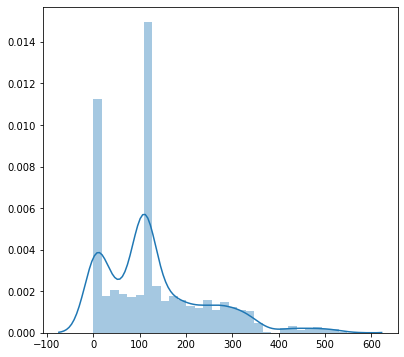

In [89]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.distplot(df_progdurdays, hist = True, bins=30)

Since there was more than 20% null values, I imputed using median. This has affected the distribution and will also affect our predictions. In the future, I would like to use a KNN Imputer to impute all missing values.

##### number_of_interviews column imputation

In [90]:
df_numint = pd.DataFrame()
df_numint_t = pd.DataFrame()
df_numint['num_int'] = X_train['number_of_interviews']
df_numint_t['num_int'] = X_test['number_of_interviews']

In [91]:
mf_numint_imputer = SimpleImputer(strategy = 'median')
df_numint.iloc[:,:] = mf_numint_imputer.fit_transform(df_numint)
df_numint_t.iloc[:,:] = mf_numint_imputer.fit_transform(df_numint_t)

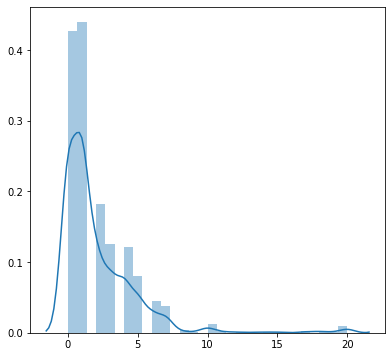

In [92]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.distplot(df_numint, hist = True, bins=30)

This is a right skewed distribution. There are maximum number of Pathrise fellows who have just started the interview process.

### Encode using one-hot method for nominal variables

In [93]:
df_primtrack = pd.DataFrame()
df_primtrack_t = pd.DataFrame()
df_primtrack = X_train['primary_track']
df_primtrack_t = X_test['primary_track']
df_primtrack_getdummies = pd.get_dummies(df_primtrack)
df_primtrack_t_getdummies = pd.get_dummies(df_primtrack_t)
df_primtrack_t_getdummies['Marketing'] =  0

In [94]:
df_empstat_dummies = pd.get_dummies(df_empstat)
df_empstat_dummies_t = pd.get_dummies(df_empstat_t)

In [95]:
df_bigchallsearch_dummies = pd.get_dummies(df_bigchallsearch)
df_bigchallsearch_t_dummies = pd.get_dummies(df_bigchallsearch_t)

In [96]:
df_workauthstat_dummies = pd.get_dummies(df_workauthstat)
df_workauthstat_dummies_t = pd.get_dummies(df_workauthstat_t)

In [97]:
df_gender_dummies = pd.get_dummies(df_gender)
df_gender_dummies_t = pd.get_dummies(df_gender_t)

In [98]:
df_race_dummies = pd.get_dummies(df_race)
df_race_dummies_t = pd.get_dummies(df_race_t)

### Encode ordinal variables by assigning values

In [99]:
df_highedu_en = df_highedu.replace({"high_edu": 
                    {"Some High School": 0, 
                     "High School Graduate" : 1,
                     "GED or equivalent": 2,
                     "Some College, No Degree": 3,
                     "Bachelors Degree" : 4, 
                     "Masters Degree": 5,
                     "Doctorate or Professional Degree":6 }})
df_highedu_t_en = df_highedu_t.replace({"high_edu": 
                    {"Some High School": 0, 
                     "High School Graduate" : 1,
                     "GED or equivalent": 2,
                     "Some College, No Degree": 3,
                     "Bachelors Degree" : 4, 
                     "Masters Degree": 5,
                     "Doctorate or Professional Degree":6 }})

In [100]:
df_lenjobresearch_en=df_lenjobsearch.replace({"job_search" : 
                    {"Less than one month": 0, 
                     "1-2 months": 1, 
                     "3-5 months": 2,
                     "6 months to a year": 3,
                     "Over a year": 4}})
df_lenjobresearch_t_en=df_lenjobsearch_t.replace({"job_search" : 
                    {"Less than one month": 0, 
                     "1-2 months": 1, 
                     "3-5 months": 2,
                     "6 months to a year": 3,
                     "Over a year": 4}})

In [101]:
df_profexp_en=df_profexp.replace({"prof_exp" :
                                 {"Less than one year" : 0,
                                 "1-2 years" : 1,
                                 "3-4 years" : 2,
                                 "5+ years" : 3}})
df_profexp_t_en=df_profexp_t.replace({"prof_exp" :
                                 {"Less than one year" : 0,
                                 "1-2 years" : 1,
                                 "3-4 years" : 2,
                                 "5+ years" : 3}})

My first approach was using Ordinal Encoders. However, this affected the order of my index. Hence I used a 'search and replace' method.

In [120]:
num_app = pd.DataFrame()
num_app = X_train['number_of_applications']
num_app_t = X_test['number_of_applications']

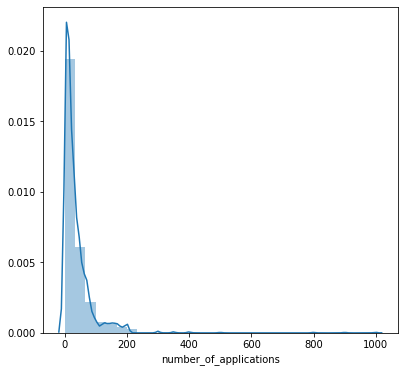

In [121]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.distplot(num_app, hist = True, bins=30)

There are maximum number of pathrise fellows who have just started applying.

### Merge all dataframes

In [122]:
#Merge all train dataframes together
tog= df_primtrack_getdummies
tog_1=pd.merge(tog,df_empstat_dummies, left_index=True, right_index=True )
tog_2=pd.merge(tog_1, df_bigchallsearch_dummies, left_index=True, right_index=True)
tog_3=pd.merge(tog_2, df_workauthstat_dummies, left_index=True, right_index=True)
tog_4=pd.merge(tog_3, df_gender_dummies, left_index=True, right_index=True)
tog_5=pd.merge(tog_4, df_race_dummies, left_index=True, right_index=True)
tog_6=pd.merge(tog_5, df_highedu_en, left_index=True, right_index=True)
tog_7=pd.merge(tog_6, df_lenjobresearch_en, left_index=True, right_index=True)
tog_8=pd.merge(tog_7, df_profexp_en, left_index=True, right_index=True)
tog_9=pd.merge(tog_8, df_progdurdays, left_index=True, right_index=True)
tog_10=pd.merge(tog_9, df_numint, left_index=True, right_index=True)
tog_11=pd.merge(tog_10, num_app, left_index=True, right_index=True)
#merged training dataframe
tog_11

,Biology,Chemistry,Computer Science,Math,Physics,Statistics,col_Contractor,col_Employed Full-Time,col_Employed Part-Time,col_Student,...,col_Native American or Alaskan Native,col_Non-Hispanic White or Euro-American,col_South Asian or Indian American,col_Two or More Races,high_edu,job_search,prof_exp,pro_dur,num_int,number_of_applications
1797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,110.0,2.0,10
1540,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,4,2,1,0.0,0.0,25
1186,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,5,1,0,110.0,0.0,80
399,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,4,2,1,0.0,5.0,10
422,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,6,3,0,110.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,5,2,0,522.0,1.0,25
920,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,4,2,0,263.0,0.0,160
305,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,5,1,0,94.0,0.0,50
1809,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,5,0,1,237.0,0.0,15


In [123]:
tog_t=df_primtrack_t_getdummies
tog_t_1=pd.merge(tog_t,df_empstat_dummies_t, left_index=True, right_index=True )
tog_t_2=pd.merge(tog_t_1,df_bigchallsearch_t_dummies, left_index=True, right_index=True )
tog_t_3=pd.merge(tog_t_2,df_workauthstat_dummies_t, left_index=True, right_index=True )
tog_t_4=pd.merge(tog_t_3,df_gender_dummies_t, left_index=True, right_index=True )
tog_t_5=pd.merge(tog_t_4,df_race_dummies_t, left_index=True, right_index=True )
tog_t_6=pd.merge(tog_t_5,df_highedu_t_en, left_index=True, right_index=True )
tog_t_7=pd.merge(tog_t_6,df_lenjobresearch_t_en, left_index=True, right_index=True )
tog_t_8=pd.merge(tog_t_7,df_profexp_t_en, left_index=True, right_index=True )
tog_t_9=pd.merge(tog_t_8, df_progdurdays_t, left_index=True, right_index=True)
tog_t_10=pd.merge(tog_t_9, df_numint_t, left_index=True, right_index=True)
tog_t_11=pd.merge(tog_t_10, num_app_t, left_index=True, right_index=True)
#merged test dataframe
tog_t_11

,Biology,Chemistry,Computer Science,Math,Physics,Marketing,col_Contractor,col_Employed Full-Time,col_Employed Part-Time,col_Student,...,col_Native American or Alaskan Native,col_Non-Hispanic White or Euro-American,col_South Asian or Indian American,col_Two or More Races,high_edu,job_search,prof_exp,pro_dur,num_int,number_of_applications
384,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,4,1,1,116.5,3.0,35
1765,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,4,2,3,236.0,0.0,3
1259,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,5,0,1,116.5,3.0,6
1435,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,5,1,1,257.0,5.0,15
715,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,4,1,1,95.0,5.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,4,1,2,116.5,2.0,20
727,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,5,2,3,121.0,1.0,190
679,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,4,0,0,472.0,1.0,15
2501,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,6,2,1,0.0,0.0,45


### Apply Logistic Regression Model 

In [124]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter = 10000)
logmodel.fit(tog_11,y_train)
predictions = logmodel.predict(tog_t_11)

In [125]:
logmodel.score(tog_t_11,y_test)

0.6635220125786163

Initially, when I tried I got 100% accuracy.This is likely because of the perfect correlation between 'pathrise_status' and 'placed'. So I dropped 'pathrise_status'. I would further try to fine tune this model, by analyzing relationship between continuous variables and assign weights. For eg, I would further investigate if 'number_of_applications', 'number_of_interviews' and 'program_duration_days' are correlated. I would use KNN Imputer to impute values into missing values. This would be more accurate than median or mean.

In [126]:
#how many days

In [109]:
X_new_train_df = tog_11
X_new_train_df 

,Biology,Chemistry,Computer Science,Math,Physics,Statistics,col_Contractor,col_Employed Full-Time,col_Employed Part-Time,col_Student,...,col_Native American or Alaskan Native,col_Non-Hispanic White or Euro-American,col_South Asian or Indian American,col_Two or More Races,high_edu,job_search,prof_exp,pro_dur,num_int,number_of_applications
1797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,110.0,2.0,10
1540,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,4,2,1,0.0,0.0,25
1186,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,5,1,0,110.0,0.0,80
399,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,4,2,1,0.0,5.0,10
422,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,6,3,0,110.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,5,2,0,522.0,1.0,25
920,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,4,2,0,263.0,0.0,160
305,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,5,1,0,94.0,0.0,50
1809,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,5,0,1,237.0,0.0,15


In [114]:
y_new_train_df = y_new_df
y_new_train_df

{}

In [115]:
X_new_test_df = tog_t_11
X_new_test_df
y_new_test_df = X_new_test_df['pro_dur']

In [116]:
y_new_test_df

384     116.5
1765    236.0
1259    116.5
1435    257.0
715      95.0
        ...  
2205    116.5
727     121.0
679     472.0
2501      0.0
283     325.0
Name: pro_dur, Length: 636, dtype: float64

In [117]:
X_new_test_df

,Biology,Chemistry,Computer Science,Math,Physics,Marketing,col_Contractor,col_Employed Full-Time,col_Employed Part-Time,col_Student,...,col_Native American or Alaskan Native,col_Non-Hispanic White or Euro-American,col_South Asian or Indian American,col_Two or More Races,high_edu,job_search,prof_exp,pro_dur,num_int,number_of_applications
384,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,4,1,1,116.5,3.0,35
1765,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,4,2,3,236.0,0.0,3
1259,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,5,0,1,116.5,3.0,6
1435,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,5,1,1,257.0,5.0,15
715,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,4,1,1,95.0,5.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,4,1,2,116.5,2.0,20
727,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,5,2,3,121.0,1.0,190
679,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,4,0,0,472.0,1.0,15
2501,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,6,2,1,0.0,0.0,45


In [118]:
reg = LinearRegression().fit(X_new_train_df ,y_new_train_df )

TypeError: Singleton array array({}, dtype=object) cannot be considered a valid collection.

In [119]:
reg.score(X_new_test_df, y_new_test_df)

NameError: name 'reg' is not defined

##### Since there is no linear relationship between the variables, we will have to explore another distribution like Poisson to arrive at number of days to get hired.

Business recommendations: It would be ideal to work intensively with pathrise fellows who have '1-2 years experience' and who are not 'hearing back after applications'. This will overall increase Pathrise profitability.